In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

Il y a deux façons de coder dans Matplotlib :
Méthode Fonctionnelle
La première est la méthode Fonctionnelle :

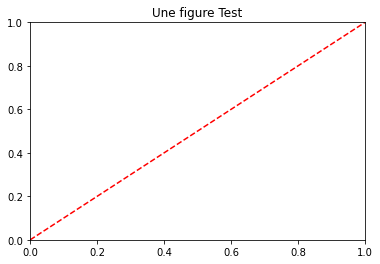

In [18]:
plt.figure()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Une figure Test')        
plt.show()

L’autre méthode est appelée la méthode Orienté Objet

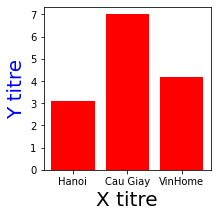

In [20]:
fig, ax = plt.subplots(figsize=(3,3))
ax.bar(x=['Hanoi','Cau Giay','VinHome'], height=[3.1,7,4.2], color='r')
ax.set_xlabel(xlabel='X titre', size=20)
ax.set_ylabel(ylabel='Y titre' , color='b', size=20)
plt.show()

Voyons un exemple simple de création d’un graphique linéaire avec une interface orientée objet.

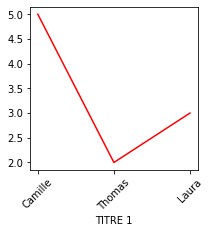

In [21]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(['Camille','Thomas','Laura'], [5,2,3], color='r')
ax.set_xlabel('TITRE 1')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

Visualisations de données Python – Quelques types de graphiques courants
Maintenant que vous avez une idée générale du fonctionnement de Matplotlib, il est temps d’examiner quelques tracés courants.

Diagrammes de dispersion – Nuage de points (x : Numérique #1, y : Numérique #2)
–> Scatter plots.

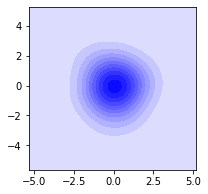

In [22]:
# 2D kde plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)
numerical_1 = np.random.randn(100)
np.random.seed(2)
numerical_2 = np.random.randn(100)
fig, ax = plt.subplots(figsize=(3,3))
sns.kdeplot(data=numerical_1,
            data2= numerical_2,
            ax=ax,
            shade=True, 
            color="blue",  
            bw=1)
plt.show()

La clé est l’argument ax=ax. En exécutant la méthode .kdeplot(), seaborn applique les changements à ax, un objet “axes”.

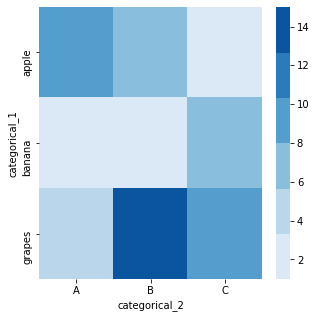

In [23]:
# heat map
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(dict(categorical_1=['apple', 'banana', 'grapes',
                                      'apple', 'banana', 'grapes',
                                      'apple', 'banana', 'grapes'], 
                  categorical_2=['A','A','A','B','B','B','C','C','C'], 
                  value=[10,2,5,7,3,15,1,6,8]))
pivot_table = df.pivot("categorical_1", "categorical_2", "value")
# Essayez d'imprimer pivot_table pour voir à quoi cela ressemble !
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data=pivot_table, 
            cmap=sns.color_palette("Blues"),
            ax=ax)
plt.show()

Il s’agit du code de la carte de chaleur un peu plus haut.

Augmenter la dimension de vos graphiques
Pour ces graphiques de base, seule une quantité limitée d’informations peut être affichée (2 à 3 variables). Et si nous souhaitons afficher plus d’informations sur ces graphiques ? Voici quelques possibilités :

Superposition de tracés
Si plusieurs graphiques linéaires partagent les mêmes variables x et y, vous pouvez appeler les graphiques Seaborn plusieurs fois et les tracer tous sur la même figure. Dans l’exemple ci-dessous, nous avons ajouté une variable catégorielle supplémentaire [value = alpha, beta] dans le graphique avec des tracés superposés.

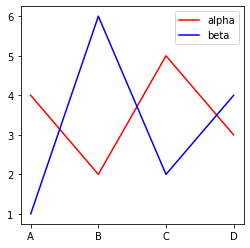

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             ax=ax)
sns.lineplot(x=['A','B','C','D'], 
             y=[1,6,2,4], 
             color='b',
             ax=ax)    
ax.legend(['alpha', 'beta'], facecolor='w')
plt.show()

On peut aussi combiner un graphique en barres et un graphique linéaire avec le même axe x mais un axe y différent :

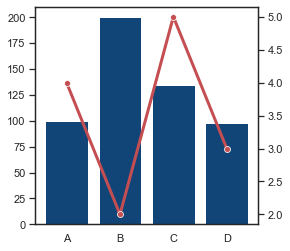

In [25]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
sns.barplot(x=['A','B','C','D'],
            y=[100,200,135,98], 
            color='#004488',
            ax=ax1)
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             marker="o",
             ax=ax2)
plt.show()
sns.set()

Quelques commentaires ici. Comme les deux tracés ont des axes y différents, nous devons créer un autre objet “axes” avec le même axe x (en utilisant .twinx()) et ensuite tracer sur des “axes” différents.
sns.set(…) sert à définir une esthétique spécifique pour le tracé actuel, et nous lançons sns.set() à la fin pour rétablir les paramètres par défaut.

La combinaison de différents diagrammes à barres en un diagramme à barres groupé ajoute également une dimension catégorielle au diagramme (une variable catégorielle de plus).

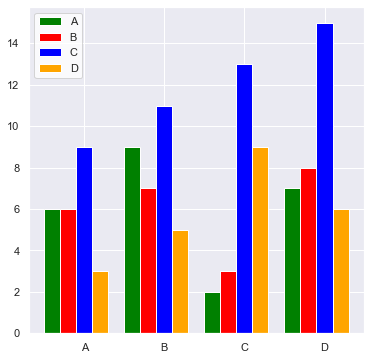

In [26]:
categorical_1 = ['A', 'B', 'C', 'D']
colors        = ['green', 'red', 'blue', 'orange']
numerical = [[6, 9, 2, 7],
             [6, 7, 3, 8],
             [9, 11, 13, 15],
             [3, 5, 9, 6]]
number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1)
fig, ax = plt.subplots(figsize=(6,6))
for i in range(number_groups):
    ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color=colors[i],
           align='center')
ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): décalage du xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(categorical_1, facecolor='w')
plt.show()

Dans l’exemple de code ci-dessus, vous pouvez personnaliser les noms de variables, les couleurs et la taille des chiffres.
number_groups et bin_width sont calculés sur la base des données d’entrée. J’ai ensuite écrit une boucle pour tracer les barres, une couleur à la fois, et mettre les tics et les légendes à la toute fin.



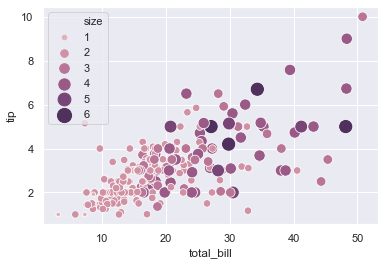

In [27]:
import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip",                      
                     hue="size", size="size",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=tips)
plt.show()


Partitionner la figure avec GridSpec
L’un des avantages de l’interface orientée objet, c’est que nous pouvons facilement diviser notre figure en plusieurs sous-parcelles et manipuler chaque sous-parcelle avec l’API “axes”.

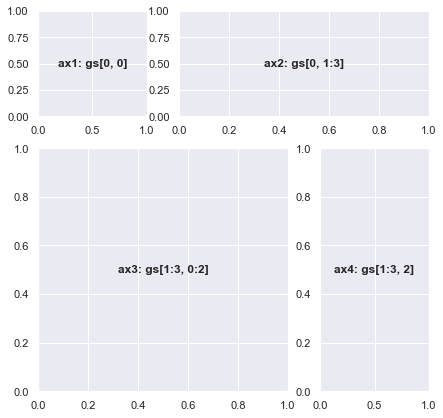

In [28]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, 'ax1: gs[0, 0]', fontsize=12, fontweight="bold", va="center", ha="center")  # adding text to ax1
ax2 = fig.add_subplot(gs[0, 1:3])
ax2.text(0.5, 0.5, 'ax2: gs[0, 1:3]', fontsize=12, fontweight="bold", va="center", ha="center")
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax3.text(0.5, 0.5, 'ax3: gs[1:3, 0:2]', fontsize=12, fontweight="bold", va="center", ha="center")
ax4 = fig.add_subplot(gs[1:3, 2])
ax4.text(0.5, 0.5, 'ax4: gs[1:3, 2]', fontsize=12, fontweight="bold", va="center", ha="center")
plt.show()

Dans l’exemple, nous divisons d’abord la figure en 3*3 = 9 petites cases avec gridspec.GridSpec(), puis nous définissons quelques objets axes. Chaque objet d’axe peut contenir une ou plusieurs cases.
Disons que dans le code ci-dessus, gs[0, 1:3] = gs[0, 1] + gs[0, 2] est attribué à l’objet axes ax2.
wspace et hspace sont des paramètres contrôlant l’espace entre les tracés.

Créer des visualisations de données Python avancées
Avec les tutoriels des sections précédentes, il est temps de produire des choses intéressantes.

In [32]:
df = pd.read_csv('C:\\Users\\ADMIN\Projets\\BlackFriday.csv', usecols = ['User_ID', 'Gender', 'Age', 'Purchase'])
df_gp_1 = df[['User_ID', 'Purchase']].groupby('User_ID').agg(np.mean).reset_index()
df_gp_2 = df[['User_ID', 'Gender', 'Age']].groupby('User_ID').agg(max).reset_index()
df_gp = pd.merge(df_gp_1, df_gp_2, on = ['User_ID'])

Vous obtenez alors un tableau indiquant l’identifiant de l’utilisateur, son sexe, son âge et le prix moyen des articles achetés par chaque client.

Etape 1 : Objectif
Nous sommes curieux de savoir comment l’âge et le sexe influent sur le prix moyen des articles achetés pendant le Black Friday, et nous espérons voir la répartition des prix également. Nous voulons également connaître les pourcentages pour chaque groupe d’âge.

Etape 2 : Variables
Nous aimerions inclure le groupe d’âge (catégorique), le sexe (catégorique), le prix moyen de l’article (numérique) et la distribution du prix moyen de l’article (numérique) dans le graphique. Nous devons inclure une autre parcelle avec le pourcentage pour chaque groupe d’âge (groupe d’âge + nombre/fréquence).

Pour montrer le prix moyen de l’article + ses distributions, nous pouvons utiliser le graphique de densité des noyaux (kde), des boîtes à moustaches ou diagramme du violon violon.
Parmi celles-ci, le kde montre la meilleure distribution. Nous traçons ensuite deux ou plusieurs graphiques kde dans la même figure, puis nous faisons des graphiques facet, de sorte que les informations sur le groupe d’âge et le sexe puissent être incluses. Pour l’autre graphique, un diagramme à barres peut faire l’affaire.

Visualisation de données
Une fois que nous avons un plan sur les variables, nous pourrions alors réfléchir à la façon de le visualiser. Nous devons d’abord faire des partitions de figures, cacher certaines limites, des xticks et des yticks, puis ajouter un diagramme à barres sur la droite.

Le graphique ci-dessous est ce que nous allons créer. À partir de la figure, nous pouvons clairement voir que les hommes ont tendance à acheter des articles plus chers que les femmes, d’après les données, et que les personnes âgées ont tendance à acheter des articles plus chers (la tendance est plus claire pour les 4 groupes d’âge supérieurs). Nous avons également constaté que les personnes âgées de 18 à 45 ans sont les principaux acheteurs dans les ventes du Black Friday.

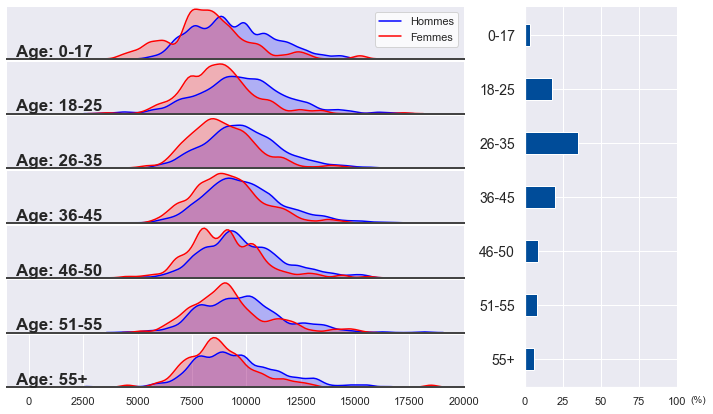

In [33]:
freq = ((df_gp.Age.value_counts(normalize = True).reset_index().sort_values(by = 'index').Age)*100).tolist()
number_gp = 7
# freq = le pourcentage pour chaque groupe d'âge (et il y a 7 groupes d'âge).
def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.05, var_name, fontsize=17, fontweight="bold", transform = ax.transAxes) 
    return None
# Manipulez chaque objet de l'axe à gauche. Essayez de régler certains paramètres et vous saurez comment fonctionne chaque commande.
fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(nrows=number_gp, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [3, 1],
                       height_ratios= [1]*number_gp,
                       wspace=0.2, hspace=0.05
                      )
ax = [None]*(number_gp + 1)
features = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
# Créez une figure, divisez la figure en boîtes de 7*2, mettez en place un tableau d'axes pour stocker les objets des axes, et créez une liste de noms de groupes d'âge.  
for i in range(number_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i], 'Age: ' + str(features[i]), -1000, 20000)    
    
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'M') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="blue",  bw=300, legend=False)
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'F') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="red",  bw=300, legend=False)
    
    if i < (number_gp - 1): 
        ax[i].set_xticks([])
# cette boucle for consiste à créer un ensemble d'objets axes et à les relier à des boîtes GridSpec. Ensuite, nous les manipulons avec sns.kdeplot() et ax_settings() que nous venons de définir.
ax[0].legend(['Hommes', 'Femmes'], facecolor='w')
# ajout de légendes sur l'objet axes     
ax[number_gp] = fig.add_subplot(gs[:, 1])
ax[number_gp].spines['right'].set_visible(False)
ax[number_gp].spines['top'].set_visible(False)
ax[number_gp].barh(features, freq, color='#004c99', height=0.4)
ax[number_gp].set_xlim(0,100)
ax[number_gp].invert_yaxis()
ax[number_gp].text(1.09, -0.04, '(%)', fontsize=10, transform = ax[number_gp].transAxes)   
ax[number_gp].tick_params(axis='y', labelsize = 14)
# Manipulez le diagramme à droite. Essayez de commenter certaines des commandes pour voir ce qu'elles font réellement au diagramme.
plt.show()
